In [48]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [47]:
df = pd.read_csv('clean_toy_data')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      27562 non-null  int64  
 1   title           27558 non-null  object 
 2   year            2313 non-null   float64
 3   price           26654 non-null  float64
 4   neighborhood    24588 non-null  object 
 5   description     27559 non-null  object 
 6   url             27562 non-null  object 
 7   model           27562 non-null  object 
 8   vin             9633 non-null   object 
 9   condition       16619 non-null  object 
 10  cryptocurrency  150 non-null    object 
 11  delivery        1642 non-null   object 
 12  engine_size     10821 non-null  float64
 13  fuel_type       25462 non-null  object 
 14  mileage         20065 non-null  float64
 15  color           17789 non-null  object 
 16  street legal    6261 non-null   object 
 17  title status    21732 non-null 

In [49]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df2['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df2['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df2['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

NameError: name 'df2' is not defined

Text(0.5, 1.0, 'years plotted by row')

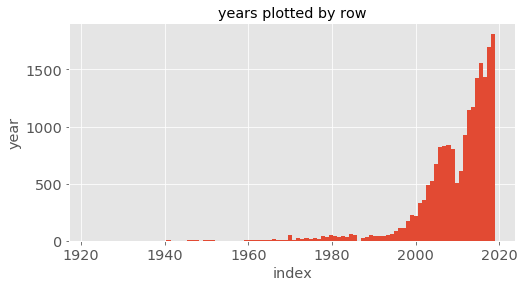

In [50]:
plt.hist(df['year'], 100)
    
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


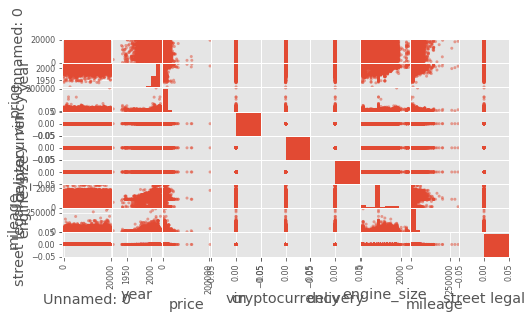

In [51]:
pd.plotting.scatter_matrix(df)
plt.show()

In [52]:
df.head()

,Unnamed: 0,title,year,price,neighborhood,description,url,model,vin,condition,cryptocurrency,delivery,engine_size,fuel_type,mileage,color,street legal,title status,transmission,bike type
0,0,2016 Honda CBR300r,2016.0,2900.0,Auburn,"2016 Honda CBR300r\n6,186 miles as of listing\...",https://auburn.craigslist.org/mcy/d/auburn-uni...,2016 honda cbr300r,0,excellent,0,0,286.0,gas,14066.013152,yellow,0,clean,manual,sport bike
1,1,2017 Yamaha FZ 07 very low miles,2017.0,5000.0,Near Montgomery,"2017 Yamaha FZ-07 with only 1100 miles, bike i...",https://auburn.craigslist.org/mcy/d/montgomery...,2017 Yamaha FZ-07,0,like new,0,0,700.0,gas,1100.000000,silver,0,clean,manual,street
2,2,2006 Honda XR650L *Price Drop*,2006.0,3800.0,Auburn,"2006 Honda XR650L \n\n8,000 miles. This number...",https://auburn.craigslist.org/mcy/d/auburn-200...,2006 honda xr650l,0,excellent,0,0,650.0,gas,8100.000000,red,0,clean,manual,dual-sport
3,3,2016 Harley Davidson Roadster Sportster for Sale,2016.0,6999.0,Auburn,2016 Harley-Davidson Sportster Roadster (EVO 1...,https://auburn.craigslist.org/mcy/d/auburn-201...,2016 harley-davidson roadster,0,excellent,0,0,1202.0,gas,6200.000000,red,0,clean,manual,NaN
4,4,2008 Harley Davidson Heritage Softail Low Miles,2008.0,5000.0,Tuscaloosa,2008 Harley Davidson Heritage Softail With Onl...,https://bham.craigslist.org/mcy/d/tuscaloosa-2...,2008 harley davidson heritage classic,0,good,0,0,96.0,gas,28800.000000,red,0,clean,manual,cruiser


In [53]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'condition', 'fuel_type', 'color', 'title status', 'transmission', 'bike type'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=100, oob_score=True)
rf1.fit(X1_train, y1_train)
pred1 = rf1.predict(X1_test)

In [56]:
rf1.score(X1_test, y1_test), rf1.oob_score_

(0.4577132674185457, 0.396917582835831)